In [11]:
# ✅ Step 1: Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
#from tensorflow.keras.optimizers.legacy import Adam  
from keras.optimizers import Adam

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# ✅ Step 2: Paths & Parameters
train_path = 'Hair Diseases - dataset/train'
val_path   = 'Hair Diseases - dataset/val'
test_path  = 'Hair Diseases - dataset/test'

img_size = 224
batch_size = 16

# ✅ Step 3: Image Data Generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_path, target_size=(img_size, img_size),
                                              batch_size=batch_size, class_mode='categorical')

val_gen = val_datagen.flow_from_directory(val_path, target_size=(img_size, img_size),
                                          batch_size=batch_size, class_mode='categorical')

test_gen = test_datagen.flow_from_directory(test_path, target_size=(img_size, img_size),
                                            batch_size=batch_size, class_mode='categorical', shuffle=False)

Found 9600 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.


In [12]:

# ✅ Step 4: Load Pretrained VGG19 Model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

In [13]:

# Add custom head
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_gen.num_classes, activation='softmax', dtype='float32')(x)  # Force output to float32

model = Model(inputs=base_model.input, outputs=output)
#model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['recall'])
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Recall(name='recall')]
)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             

 Total params: 23,237,066 (88.64 MB)

 Trainable params: 3,212,682 (12.26 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [14]:

#from tensorflow.keras.callbacks import EarlyStopping

#early_stop = EarlyStopping(monitor='val_recall', patience=3, restore_best_weights=True)

# ✅ Step 5: Train the Model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=40,
    steps_per_epoch=len(train_gen),
    validation_steps=len(val_gen)
)

/opt/anaconda3/envs/tf310/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40


2026-01-19 18:41:38.892433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


600/600 ━━━━━━━━━━━━━━━━━━━━ 237s 391ms/step - accuracy: 0.1598 - loss: 4.1695 - recall: 0.1198 - val_accuracy: 0.5000 - val_loss: 1.4882 - val_recall: 0.2850
Epoch 2/40
600/600 ━━━━━━━━━━━━━━━━━━━━ 263s 438ms/step - accuracy: 0.2544 - loss: 3.5127 - recall: 0.2176 - val_accuracy: 0.5783 - val_loss: 1.1862 - val_recall: 0.4083
Epoch 3/40
600/600 ━━━━━━━━━━━━━━━━━━━━ 276s 461ms/step - accuracy: 0.3144 - loss: 3.2309 - recall: 0.2779 - val_accuracy: 0.6925 - val_loss: 0.9152 - val_recall: 0.4883
Epoch 4/40
600/600 ━━━━━━━━━━━━━━━━━━━━ 286s 476ms/step - accuracy: 0.3683 - loss: 2.7159 - recall: 0.3246 - val_accuracy: 0.7175 - val_loss: 0.7915 - val_recall: 0.5942
Epoch 5/40
600/600 ━━━━━━━━━━━━━━━━━━━━ 302s 503ms/step - accuracy: 0.4391 - loss: 2.2289 - recall: 0.3979 - val_accuracy: 0.7942 - val_loss: 0.6244 - val_recall: 0.6725
Epoch 6/40
600/600 ━━━━━━━━━━━━━━━━━━━━ 300s 500ms/step - accuracy: 0.4580 - loss: 2.0277 - recall: 0.4173 - val_accuracy: 0.8433 - val_loss: 0.5509 - val_recall

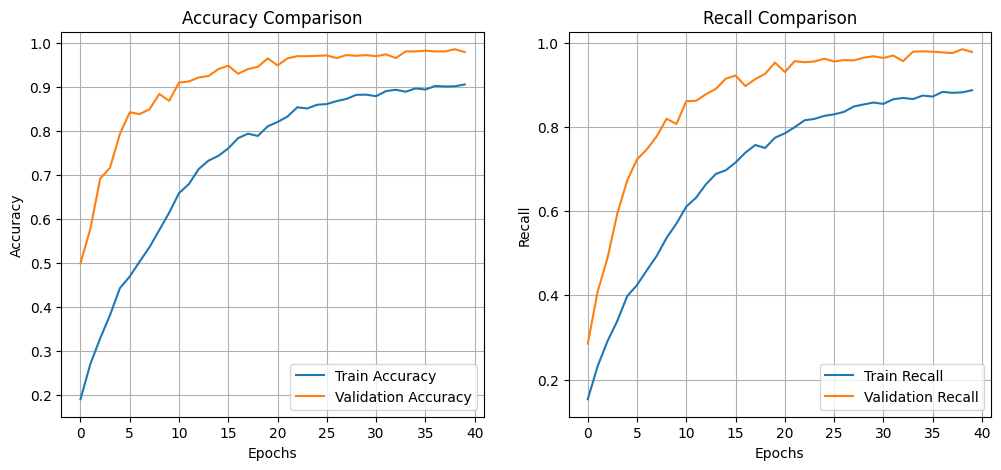

In [33]:
# ✅ Step 6: Evaluate the Model
# Accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Recall
plt.subplot(1,2,2)
plt.plot(history.history['recall'], label='Train Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.title('Recall Comparison')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.show()


## Evaluate Train, Validation & Test Sets (NUMERICAL COMPARISON)

In [17]:
train_metrics = model.evaluate(train_gen, verbose=0)
val_metrics   = model.evaluate(val_gen, verbose=0)
test_metrics  = model.evaluate(test_gen, verbose=0)

print("📊 Model Performance Summary")
print(f"Train     → Accuracy: {train_metrics[1]:.4f}, Recall: {train_metrics[2]:.4f}")
print(f"Validation→ Accuracy: {val_metrics[1]:.4f}, Recall: {val_metrics[2]:.4f}")
print(f"Test      → Accuracy: {test_metrics[1]:.4f}, Recall: {test_metrics[2]:.4f}")


📊 Model Performance Summary
Train     → Accuracy: 0.9753, Recall: 0.9664
Validation→ Accuracy: 0.9800, Recall: 0.9775
Test      → Accuracy: 0.9792, Recall: 0.9700


## Performance Table

In [26]:
import pandas as pd

performance_df = pd.DataFrame({
    "Dataset": ["Train", "Validation", "Test"],
    "Accuracy": [train_metrics[1], val_metrics[1], test_metrics[1]],
    "Recall":   [train_metrics[2], val_metrics[2], test_metrics[2]]
})

print(performance_df)


      Dataset  Accuracy    Recall
0       Train  0.975312  0.966354
1  Validation  0.980000  0.977500
2        Test  0.979167  0.970000


## ✅ 3. Save the Model

In [28]:
model.save("hair_disease_classifier.h5")